In [5]:
import csv
import psycopg2
conn = psycopg2.connect('postgresql://bedabe01:@localhost/world')
cur = conn.cursor()
cur.execute('select * from country limit 10')
res = cur.fetchall()
for row in res[:1]:
    print(row)

('AFG', 'Afghanistan', 'Asia', 'Southern and Central Asia', 652090.0, 1919, 22720000, 45.9, Decimal('5976.00'), None, 'Afganistan/Afqanestan', 'Islamic Emirate', 'Mohammad Omar', 1, 'AF')


In [6]:
import csv
import psycopg2
conn = psycopg2.connect('postgresql://bedabe01:@localhost/world')
cur = conn.cursor()
x = 'USA'
cur.execute("select code, name, region, continent from country where code = '%s'" % x)
res = cur.fetchall()
for row in res[:1]:
    print(row)

('USA', 'United States', 'North America', 'North America')


In [7]:
import csv
import psycopg2

with open('/home/faculty/millbr02/pub/un-general-debates.csv','r',encoding='latin-1') as data:
    csv_iter = csv.reader(data)
    db =[]
    for row in csv_iter:
        db.append(row)
db[:1]

[['session', 'year', 'country', 'text']]

In [8]:
import csv
import psycopg2
with open('/home/faculty/millbr02/pub/un-general-debates.csv','r',encoding='latin-1') as data:
    csv_iter = csv.reader(data)
    db = []
    for row in csv_iter:
        db.append(row)
        
unknown_country = []
other_countries = {'CSK': ['Czechoslovakia', 'Europe', 'Eastern Europe'],
                   'DDR': ['East Germany', 'Europe', 'Western Europe'],
                   'EU': ['European Union', 'Europe', 'Western Europe'],
                   'MNE': ['Montenegro', 'Europe', 'Eastern Europe'],
                   'ROU': ['Romania', 'Europe', 'Eastern Europe'],
                   'SSD': ['South Sudan', 'Africa', 'Northern Africa'],
                   'TLS': ['East Timor', 'Asia', 'Southeast Asia'],
                   'YDYE': ['Democratic Yemen', 'Asia', 'Middle East']}

for row in db[1:]:
    cur.execute("select code, name, region, continent from country where code = %s", [row[2]])
    country = cur.fetchone()
    if country:
        row.append(country[1])
        row.append(country[2])
        row.append(country[3])
        
    else:
        #print("No Entry for {}".format(row[2]))
        unknown_country.append(row[2])
        row.append(other_countries[row[2]][0])
        row.append(other_countries[row[2]][2])
        row.append(other_countries[row[2]][1])

In [9]:
years = {}
for row in db[1:]:
    yr = row[1]
    country = row[2]
    if country not in unknown_country:
        region = row[5]
        if yr not in years:
            years[yr] = {}
        if region not in years[yr]:
            years[yr][region] = 1
        else:
            years[yr][region] += 1

In [10]:
for yr in sorted(years):
    for region in sorted(years[yr]):
        print(yr, region, years[yr][region])


1970 Australia and New Zealand 2
1970 British Islands 1
1970 Caribbean 4
1970 Central Africa 2
1970 Central America 5
1970 Eastern Africa 5
1970 Eastern Asia 1
1970 Eastern Europe 2
1970 Middle East 6
1970 Nordic Countries 2
1970 North America 2
1970 Northern Africa 5
1970 South America 9
1970 Southeast Asia 6
1970 Southern Africa 1
1970 Southern Europe 3
1970 Southern and Central Asia 4
1970 Western Africa 6
1970 Western Europe 4
1971 Australia and New Zealand 2
1971 British Islands 2
1971 Caribbean 5
1971 Central Africa 6
1971 Central America 5
1971 Eastern Africa 10
1971 Eastern Asia 3
1971 Eastern Europe 6
1971 Melanesia 1
1971 Middle East 11
1971 Nordic Countries 4
1971 North America 2
1971 Northern Africa 6
1971 South America 11
1971 Southeast Asia 8
1971 Southern Africa 1
1971 Southern Europe 6
1971 Southern and Central Asia 6
1971 Western Africa 13
1971 Western Europe 5
1972 Australia and New Zealand 2
1972 British Islands 2
1972 Caribbean 5
1972 Central Africa 6
1972 Central A

1988 Australia and New Zealand 2
1988 British Islands 2
1988 Caribbean 12
1988 Central Africa 9
1988 Central America 8
1988 Eastern Africa 15
1988 Eastern Asia 3
1988 Eastern Europe 6
1988 Melanesia 4
1988 Middle East 14
1988 Nordic Countries 5
1988 North America 2
1988 Northern Africa 6
1988 Polynesia 1
1988 South America 11
1988 Southeast Asia 10
1988 Southern Africa 3
1988 Southern Europe 7
1988 Southern and Central Asia 9
1988 Western Africa 15
1988 Western Europe 6
1989 Australia and New Zealand 2
1989 British Islands 2
1989 Caribbean 13
1989 Central Africa 8
1989 Central America 8
1989 Eastern Africa 16
1989 Eastern Asia 3
1989 Eastern Europe 6
1989 Melanesia 4
1989 Middle East 13
1989 Nordic Countries 5
1989 North America 2
1989 Northern Africa 6
1989 South America 12
1989 Southeast Asia 10
1989 Southern Africa 3
1989 Southern Europe 7
1989 Southern and Central Asia 8
1989 Western Africa 15
1989 Western Europe 6
1990 Australia and New Zealand 2
1990 British Islands 2
1990 Caribb

2004 Western Africa 16
2004 Western Europe 9
2005 Australia and New Zealand 2
2005 Baltic Countries 3
2005 British Islands 2
2005 Caribbean 13
2005 Central Africa 9
2005 Central America 7
2005 Eastern Africa 15
2005 Eastern Asia 5
2005 Eastern Europe 9
2005 Melanesia 4
2005 Micronesia 5
2005 Middle East 16
2005 Nordic Countries 5
2005 North America 2
2005 Northern Africa 6
2005 Polynesia 3
2005 South America 12
2005 Southeast Asia 10
2005 Southern Africa 4
2005 Southern Europe 14
2005 Southern and Central Asia 14
2005 Western Africa 14
2005 Western Europe 9
2006 Australia and New Zealand 2
2006 Baltic Countries 3
2006 British Islands 2
2006 Caribbean 13
2006 Central Africa 9
2006 Central America 8
2006 Eastern Africa 16
2006 Eastern Asia 5
2006 Eastern Europe 9
2006 Melanesia 4
2006 Micronesia 5
2006 Middle East 18
2006 Nordic Countries 5
2006 North America 2
2006 Northern Africa 6
2006 Polynesia 3
2006 South America 12
2006 Southeast Asia 10
2006 Southern Africa 5
2006 Southern Europe

In [11]:
countryname = []
for row in range(len(res)):
    countryname.append( res[row][0]) 
Countryname = []
for item in countryname:
    if item not in Countryname:
        Countryname.append(item)
Countryname       

['USA']

In [172]:
with open('/home/faculty/millbr02/pub/un-debates-augmented-1.csv','r',encoding='latin-1') as data:
    csv_iter = csv.reader(data)
    db = []
    for row in csv_iter:
        db.append(row)
        
    Country = {}
    for line in db[1:]:
        Country[line[4]] = 0
        
    Matrix_A= {}
    for row in db[1:]:
        nation_speech = row[4]
        data = row[3]
        if nation_speech  not in Matrix_A:
            Matrix_A[nation_speech ] = Country.copy()
            
        for key in Matrix_A:
            counter = data.count(key)
            Matrix_A[nation_speech][key] += counter


In [197]:
Matrix_A[nation_speech]['Israel']

413

In [158]:
%matplotlib inline
import networkx as nx
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [14]:
g = nx.Graph()


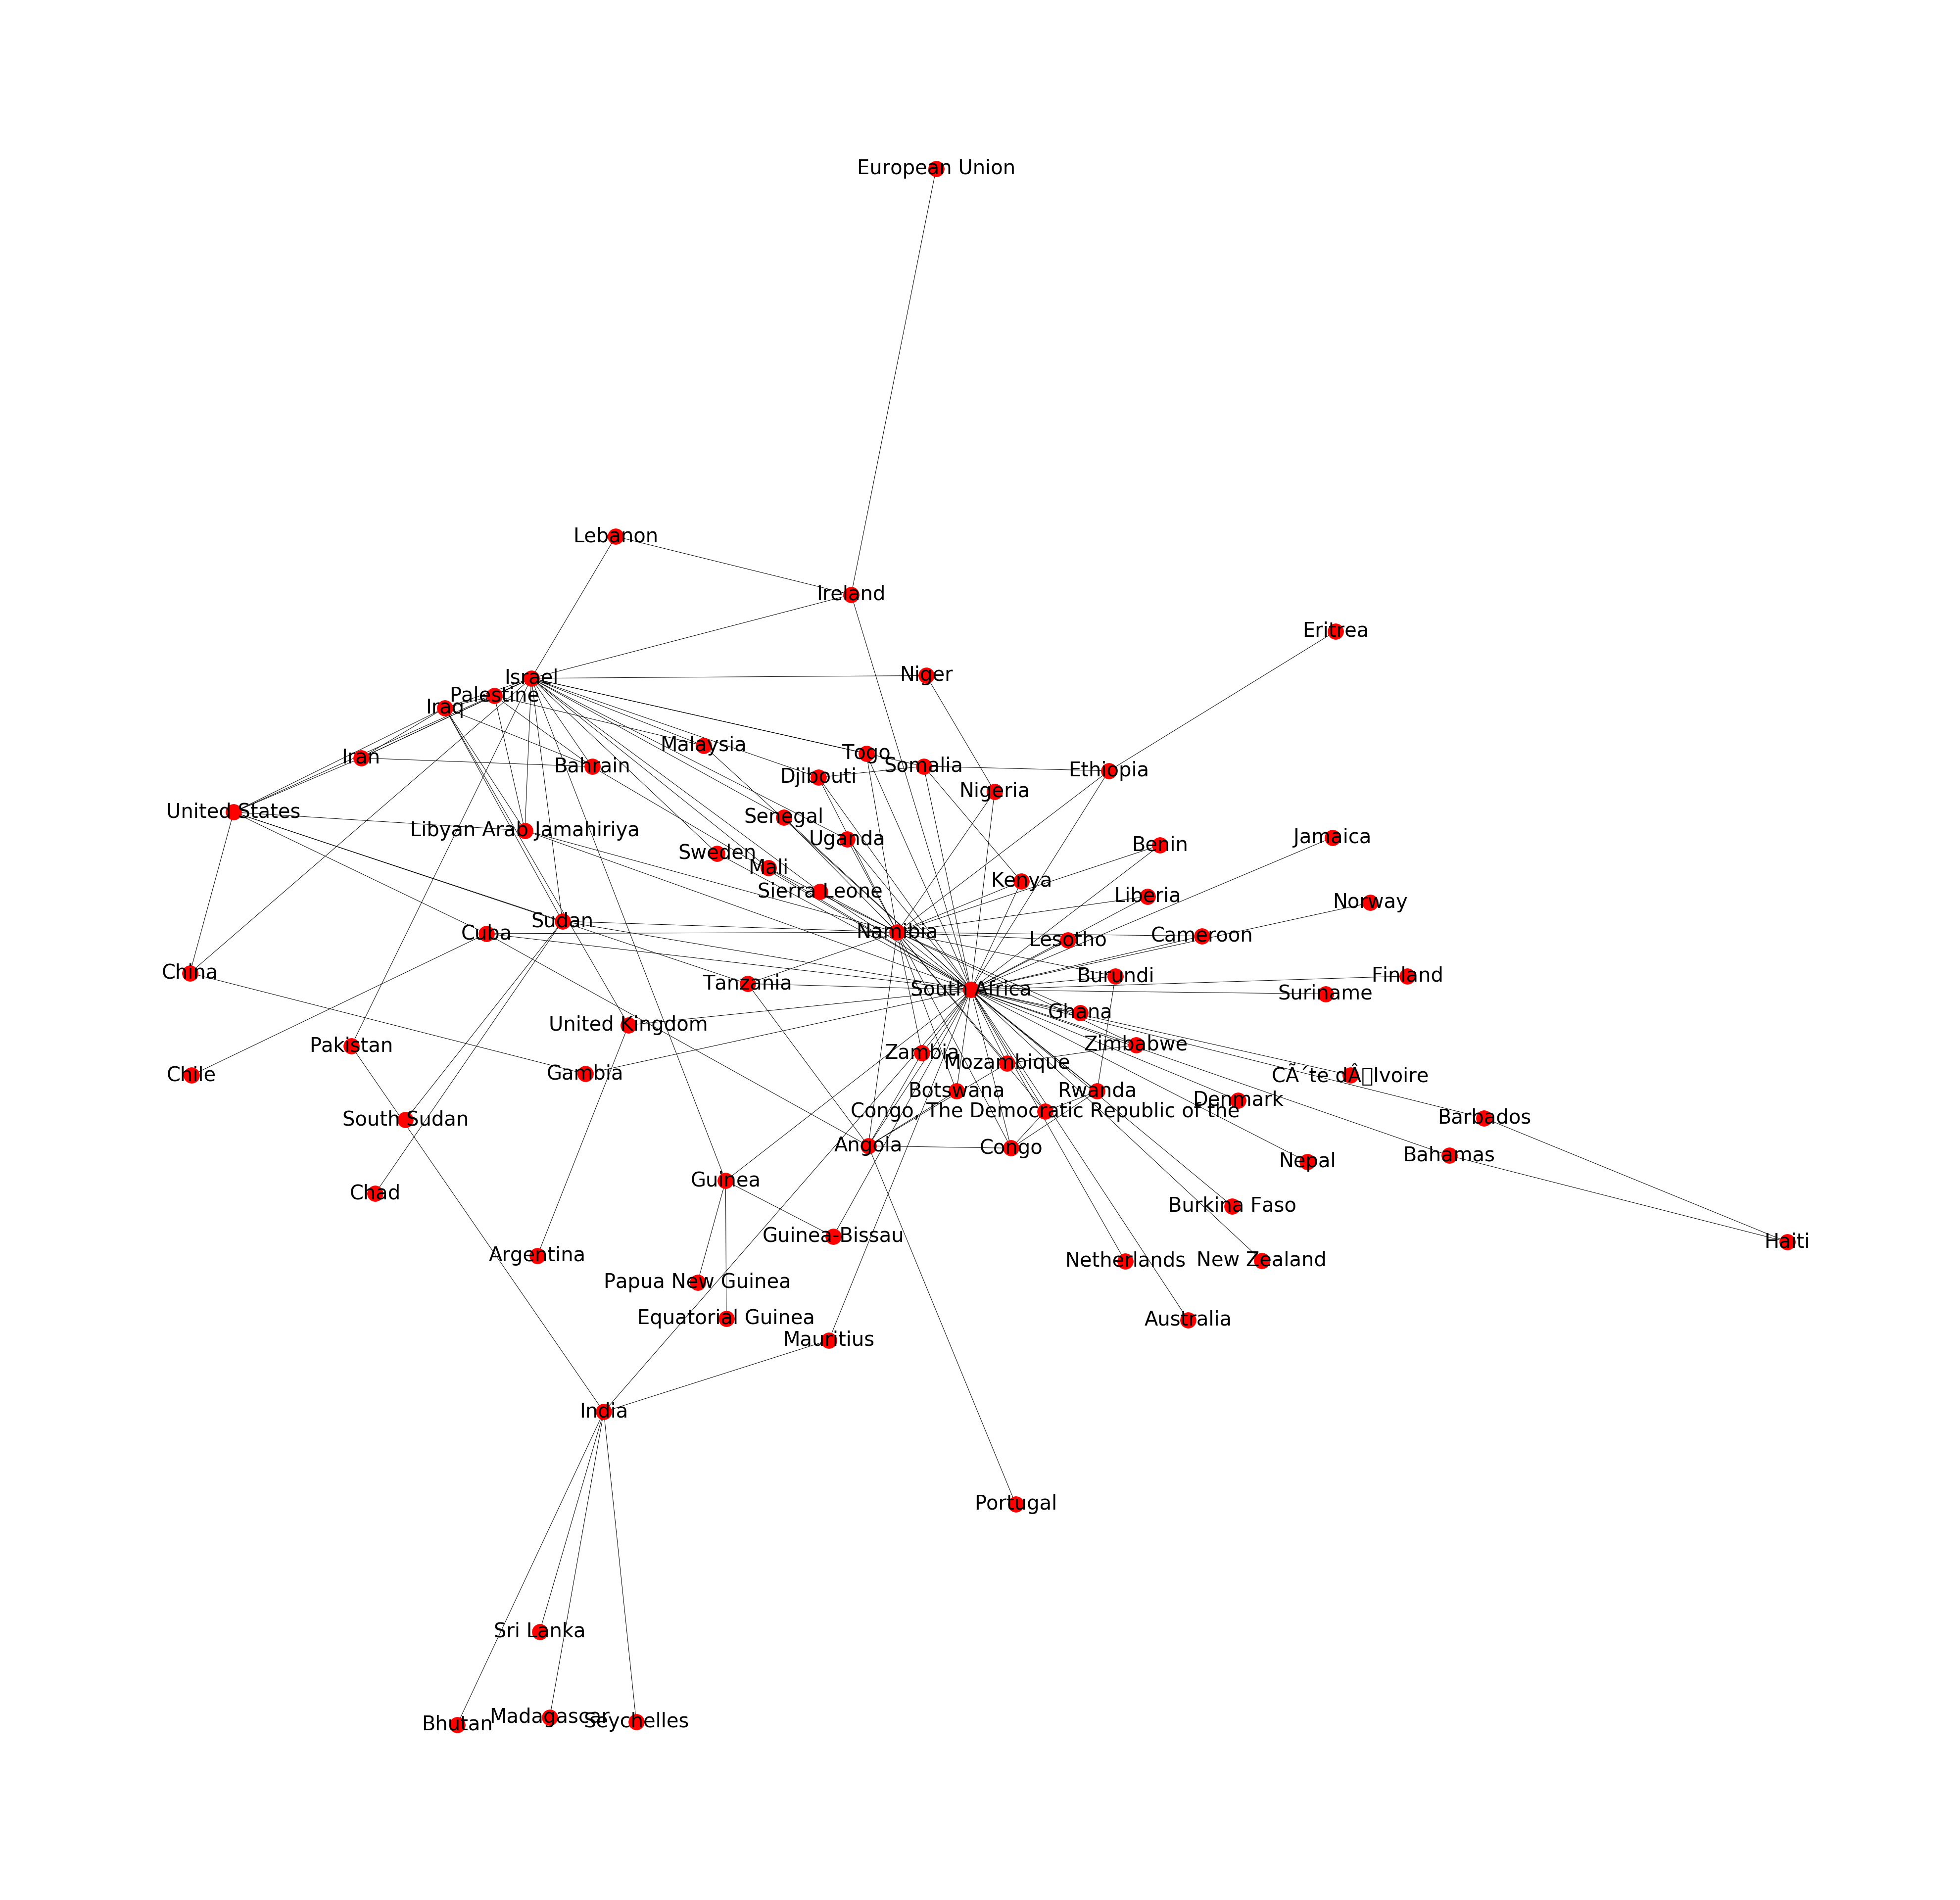

In [15]:
g.add_nodes_from(Matrix_A) 
for country in Matrix_A: 
    for country2 in Matrix_A[key]: 
        if Matrix_A[country][country2] > 80:
            g.add_edge(country, country2, weight=Matrix_A[country][country2])
gfig, gax = plt.subplots(figsize = (70,70))
hego = nx.ego_graph(g,'South Africa', radius =2)
pos = nx.spring_layout(g, k=.3, iterations=1000, scale=10, center=(0,0))
nx.draw(hego, pos, ax=gax, node_size=1000, with_labels=True, font_size=40)


In [122]:
import requests
res = requests.get("http://localhost/~bedabe01/hello.html")
res = requests.get('https://opendata.socrata.com/api/views/mnkm-8ram/rows.json?accessType=DOWNLOAD')
res.iter_lines()
j = res.json()

In [236]:
j['data'][1][10]

'DZA'

In [264]:
with open('/home/faculty/millbr02/pub/un-debates-augmented-1.csv','r',encoding='latin-1') as data:
    csv_iter = csv.reader(data)
    db =[]
    for row in csv_iter:
        db.append(row)
db[:1]

[['session', 'year', 'country', 'text', 'name', 'region', 'continent']]

In [265]:
lists = db 
for item in range(len(lists)):
    lists[item].pop(0)
    lists[item].pop(0)
    lists[item].pop(1)
    lists[item].pop(-2)
    lists[item].pop(-1)

In [266]:
lists[0].append('Mention')
lists[0].append('Latitude')
lists[0].append('Longitude')

In [267]:
lists[0:1]

[['country', 'name', 'Mention', 'Latitude', 'Longitude']]

In [268]:
List_2 = []
for item in range(len(j['data'])):
    innerlist = []
    innerlist.append(j['data'][item][10])
    innerlist.append(j['data'][item][8])
    innerlist.append(Matrix_A[nation_speech]["Albania"])
    innerlist.append(j['data'][item][5])
    innerlist.append(j['data'][item][6])
    List_2.append(innerlist)

In [269]:
List_2[:1]

[['ALB', 'Albania', 0, 1280924058, '386763']]